In [564]:
# importing useful libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression

### Some Helper functions

In [565]:
def plot(X,Y,pred=None, draw_line=False, hard_line=True):
    plt.xlabel("Population of city in 10,000s")
    plt.ylabel("Profit in $10,000")
    plt.scatter(x=X, y=Y, color="red")
    if draw_line:
        if hard_line:
            plt.plot(X, pred)
        else:
            plt.scatter(X, pred)
    plt.show()

In [566]:
def plot_3d(inp=None,pred=None, draw_line=False):
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig,auto_add_to_figure=False)
    fig.add_axes(ax)

    ax.set_xlabel("Size of House (square feet)")
    ax.set_ylabel("number of bedrooms")
    ax.set_zlabel("house prices")
    ax.scatter(data2[:,0], data2[:,1], data2[:,2], c="r", marker="o")
    if draw_line:
        ax.plot(inp[:,0] , inp[:,1], pred)
    plt.show()

![](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [567]:
class LinearRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.parameters = None
        self.cost_history = []
        self.mu = None
        self.sigma = None
    
    def calculate_cost(self):

        m = self.X.shape[0]

        y_hat = np.dot(self.X, self.parameters)
        y_hat = y_hat.reshape(-1)
        error = y_hat - self.Y

        cost = np.dot(error.T, error)/(2*m)

        gradients = np.zeros(self.X.shape[1])

        for i in range(self.X.shape[1]):
            gradients[i] = np.mean(error * self.X[:,i])

        return cost, gradients


    def init_parameters(self):
        self.parameters = np.zeros((self.X.shape[1],1))


    def feature_normalize(self, X):
        X_norm = X.copy()
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)

        self.mu = mu
        self.sigma = sigma

        for n in range(X.shape[1]):
            X_norm[:,n] = (X_norm[:,n] - mu[n]) / sigma[n]
        return X_norm

    def fit(self, x, y, learning_rate=0.01, epochs=500, is_normalize=True, verbose=0):
        self.X = x
        self.Y = y
        self.cost_history = []
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)
            is_normalize = False
        if is_normalize:
            self.X = self.feature_normalize(self.X)
        self.X = np.concatenate([np.ones((self.X.shape[0],1)), self.X], axis=1)
        self.init_parameters()

        for i in range(epochs):
            cost, gradients = self.calculate_cost()
            self.cost_history.append(cost)
            self.parameters -= learning_rate * gradients.reshape(-1,1)

            if verbose:
                if not (i % verbose):
                    print(f"Cost after {i} epochs: {cost}")

        return self.parameters


    def predict(self,x, is_normalize=True):
        x = np.array(x, dtype=np.float64) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        if is_normalize:
            for n in range(x.shape[1]):
                x[:,n] = (x[:,n] - self.mu[n]) / self.sigma[n]
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return np.dot(x,self.parameters)

![](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [568]:
data1 = np.loadtxt("./data/data1.txt", delimiter=",")
data2 = np.loadtxt("./data/data2.txt", delimiter=",")

## Fitting line on `data1` (single feature)

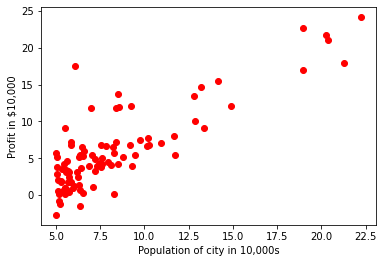

In [569]:
X1,Y1 = data1[:,0], data1[:,1]
plot(X1,Y1)

In [570]:
model = LinearRegression() # instancing LinearRegression class

In [571]:
params1 = model.fit(x=X1, y=Y1, learning_rate=0.01, epochs=1500, verbose=500)
params1

Cost after 0 epochs: 32.072733877455676
Cost after 500 epochs: 4.713809531116866
Cost after 1000 epochs: 4.515955503078913


array([[-3.63029144],
       [ 1.16636235]])

In [572]:
preds1 = model.predict(X1.reshape(-1,1), is_normalize=False)

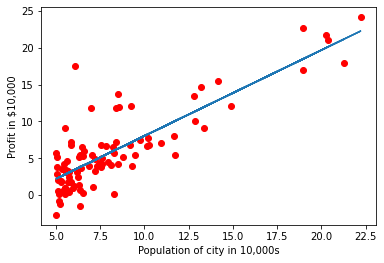

In [573]:
plot(X1,Y1,pred=preds1,draw_line=True, hard_line=True)

In [574]:
x_t = np.array([7]).reshape(1,-1) # need to add extra dimension for 1 size arrays
model.predict(x_t, is_normalize=False)*10000

array([[45342.45012945]])

### visualizing cost function for `data1`

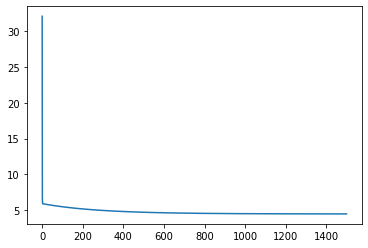

In [575]:
plt.plot([i for i in range(1500)], model.cost_history)

![](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Fitting line on `data2` (multiple features)

In [576]:
X2, Y2 = data2[:,:2], data2[:,2]
X2.shape, Y2.shape

((47, 2), (47,))

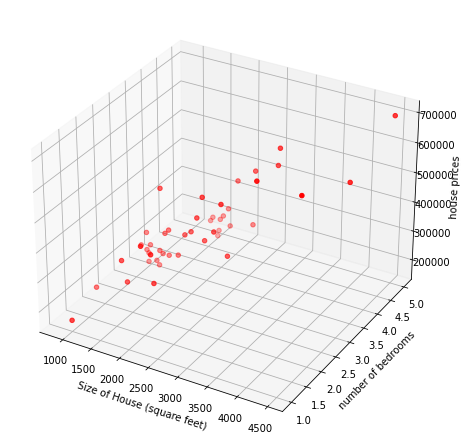

In [577]:
plot_3d()

In [578]:
model2 = LinearRegression()

In [579]:
params2 = model2.fit(x=X2, y=Y2, learning_rate=0.01, epochs=400, verbose=100)
params2

Cost after 0 epochs: 65591548106.45744
Cost after 100 epochs: 10596969344.166979
Cost after 200 epochs: 3344770635.4916563
Cost after 300 epochs: 2288004374.351834


array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

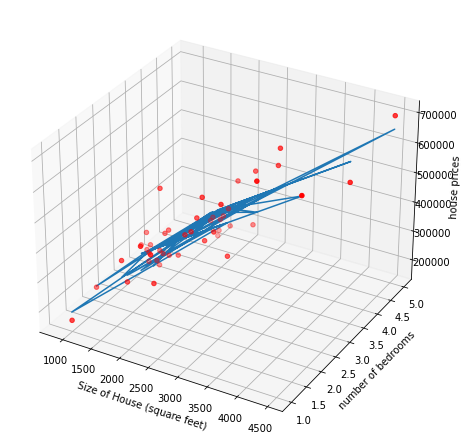

In [580]:
preds2 = model2.predict(X2).reshape(-1)
plot_3d(inp=data2, pred=preds2, draw_line=True)

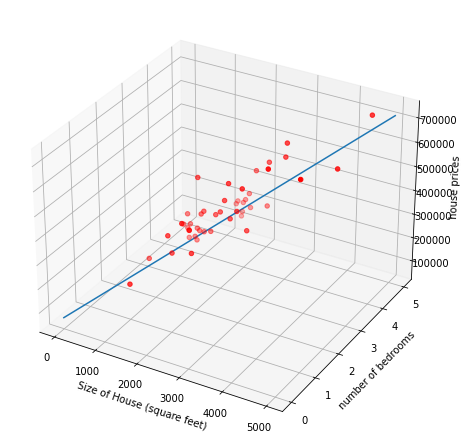

In [581]:
inp = np.concatenate([np.linspace(0,5000,5000).reshape(-1,1),np.linspace(0,5,5000).reshape(-1,1)], axis=1)

pred = model2.predict(inp)
plot_3d(inp,pred.reshape(-1),draw_line=True)

In [582]:
model2.predict([1650,3])

array([[289221.54737122]])

### visualizing cost function for `data2`

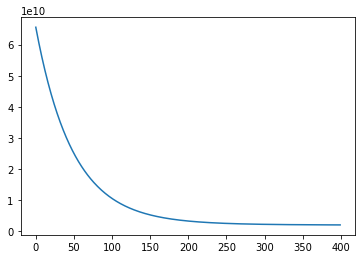

In [583]:
J = model2.cost_history
plt.plot([i for i in range(400)], J)

![](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Fitting Line on `sklean`'s dataset

In [584]:
X3,Y3 = make_regression(n_samples=100,n_features=1,n_informative=1,noise = 10,random_state=10)

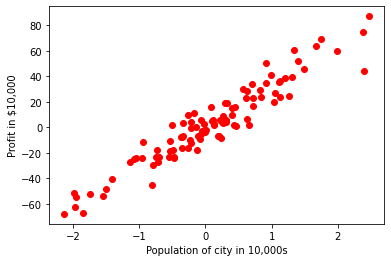

In [585]:
plot(X3,Y3)

In [586]:
model3 = LinearRegression()

In [587]:
params3 = model3.fit(x=X3, y=Y3, learning_rate=0.01, epochs=500)
params3

array([[ 2.94340656],
       [29.45362342]])

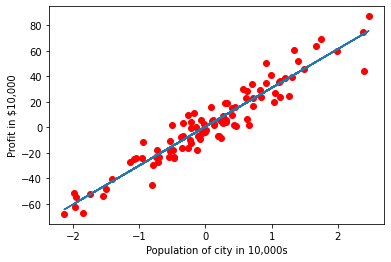

In [588]:
preds3 = model3.predict(X3)
plot(X3,Y3,preds3.reshape(-1),draw_line=True, hard_line=True)

### visualizing cost for `sklearn`'s dataset

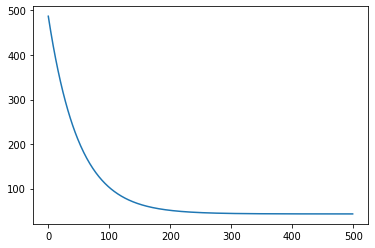

In [589]:
plt.plot([i for i in range(500)], model3.cost_history)

![](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Regularized Linear Regression

In [590]:
class LinearRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.parameters = None
        self.cost_history = []
        self.mu = None
        self.sigma = None
    
    def calculate_cost(self, lambda_=0):

        m = self.X.shape[0]

        y_hat = np.dot(self.X, self.parameters)
        y_hat = y_hat.reshape(-1)
        error = y_hat - self.Y

        cost = (np.dot(error.T, error) + lambda_*np.sum((self.parameters)**2))/(2*m)

        gradients = np.zeros(self.X.shape[1])

        for i in range(self.X.shape[1]):
            gradients[i] = (np.mean(error * self.X[:,i]) + (lambda_*self.parameters[i])/m)

        return cost, gradients


    def init_parameters(self):
        self.parameters = np.zeros((self.X.shape[1],1))


    def feature_normalize(self):
        X_norm = self.X.copy()
        mu = np.mean(self.X, axis=0)
        sigma = np.std(self.X, axis=0)

        self.mu = mu
        self.sigma = sigma

        for n in range(self.X.shape[1]):
            X_norm[:,n] = (X_norm[:,n] - mu[n]) / sigma[n]
        return X_norm

    def fit(self, x, y, learning_rate=0.01, epochs=500, lambda_=0, is_normalize=True, verbose=0):
        self.X = x
        self.Y = y
        self.cost_history = []
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)
            is_normalize = False
        if is_normalize:
            self.X = self.feature_normalize()
        self.X = np.concatenate([np.ones((self.X.shape[0],1)), self.X], axis=1)
        self.init_parameters()

        for i in range(epochs):
            cost, gradients = self.calculate_cost(lambda_=lambda_)
            self.cost_history.append(cost)
            self.parameters -= learning_rate * gradients.reshape(-1,1)

            if verbose:
                if not (i % verbose):
                    print(f"Cost after {i} epochs: {cost}")

        return self.parameters


    def predict(self,x, is_normalize=True):
        x = np.array(x, dtype=np.float64) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        if is_normalize:
            for n in range(x.shape[1]):
                x[:,n] = (x[:,n] - self.mu[n]) / self.sigma[n]
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return np.dot(x,self.parameters)

## Demonstrating Regularization on `sklearn`'s dataset

In [591]:
X3,Y3 = make_regression(n_samples=100,n_features=1,n_informative=1,noise = 10,random_state=10)

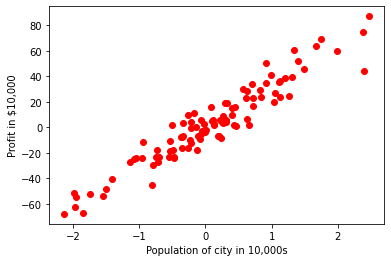

In [592]:
plot(X3,Y3)

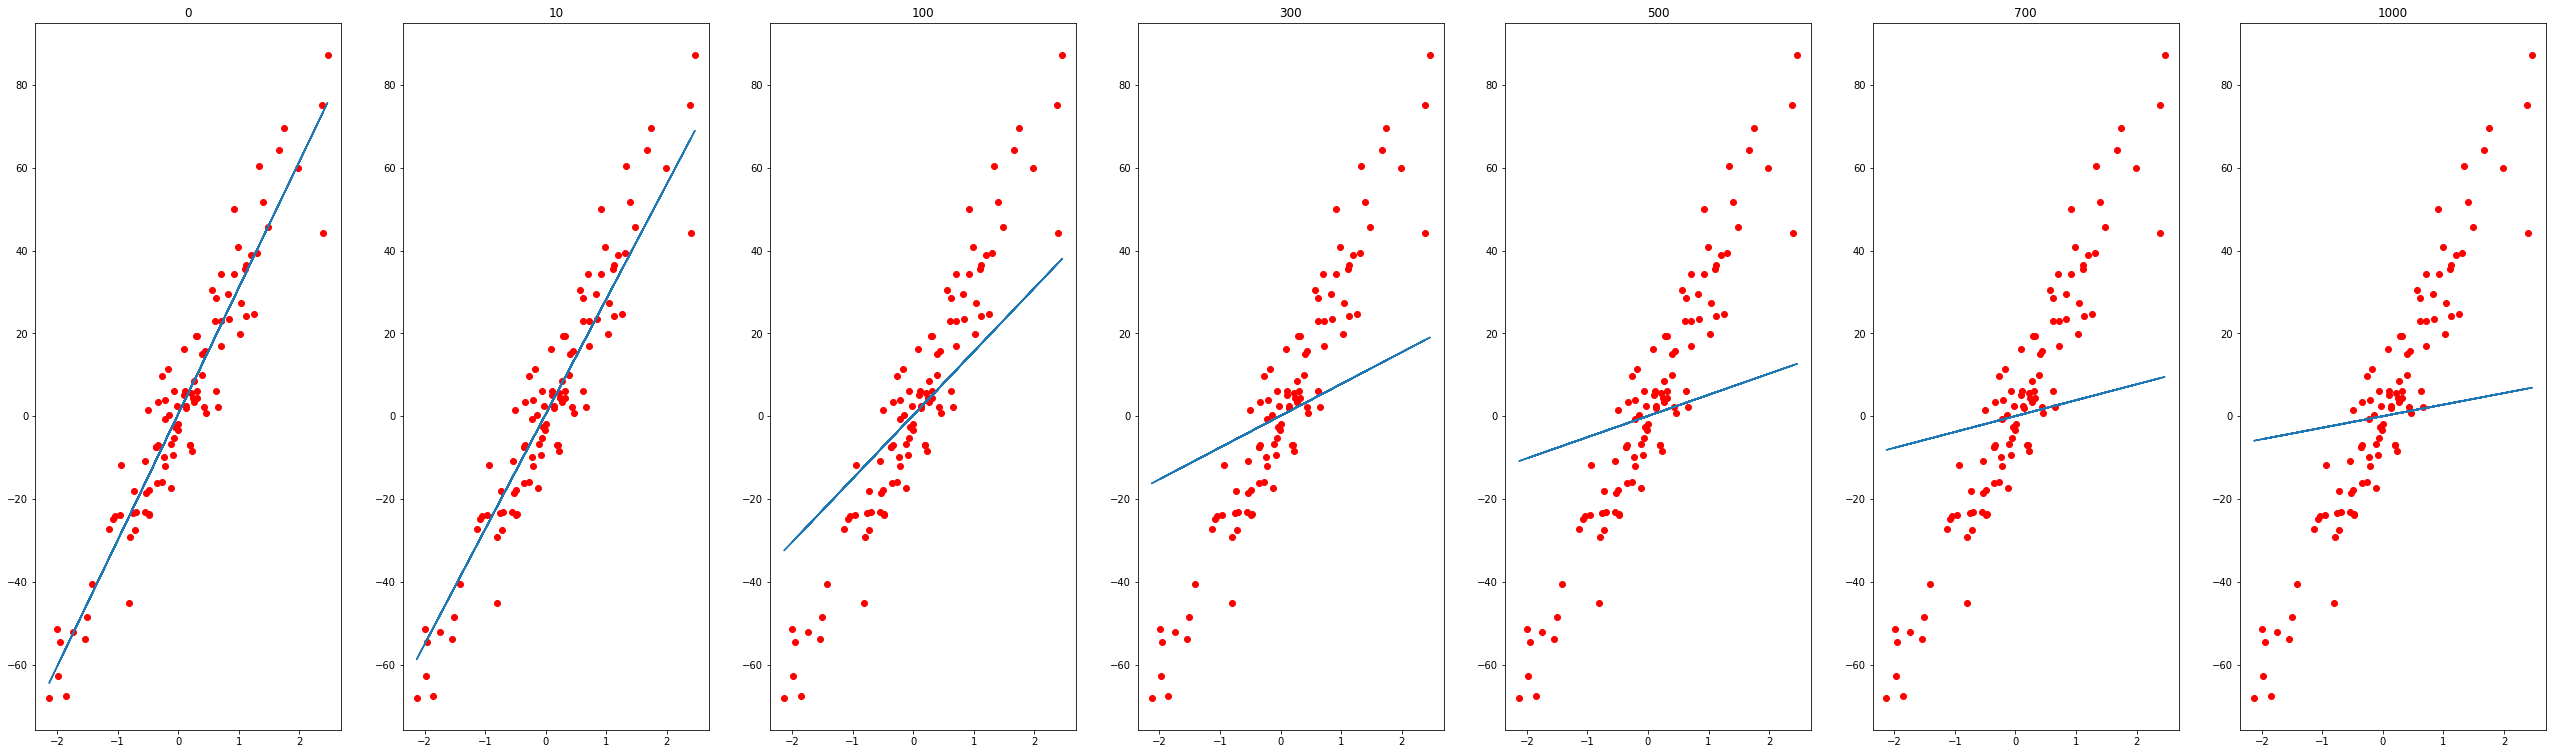

In [593]:
lambdas = [0,10,100,300,500,700,1000]
fig, ax = plt.subplots(1,len(lambdas), figsize=(45,13))
models = {}
for l in range(len(lambdas)):
    m = X3.shape[0]
    model3 = LinearRegression()
    model3.fit(x=X3, y=Y3, learning_rate=0.01,lambda_=lambdas[l],epochs=500)    
    preds = model3.predict(X3.reshape(-1,1))
    preds = preds.reshape(-1)
    models[lambdas[l]] = model3.cost_history
    ax[l].scatter(x=X3, y=Y3, color="red")
    ax[l].plot(X3,preds)
    ax[l].set_title(lambdas[l])

### visualizing cost of `sklearn`'s dataset for various lambdas

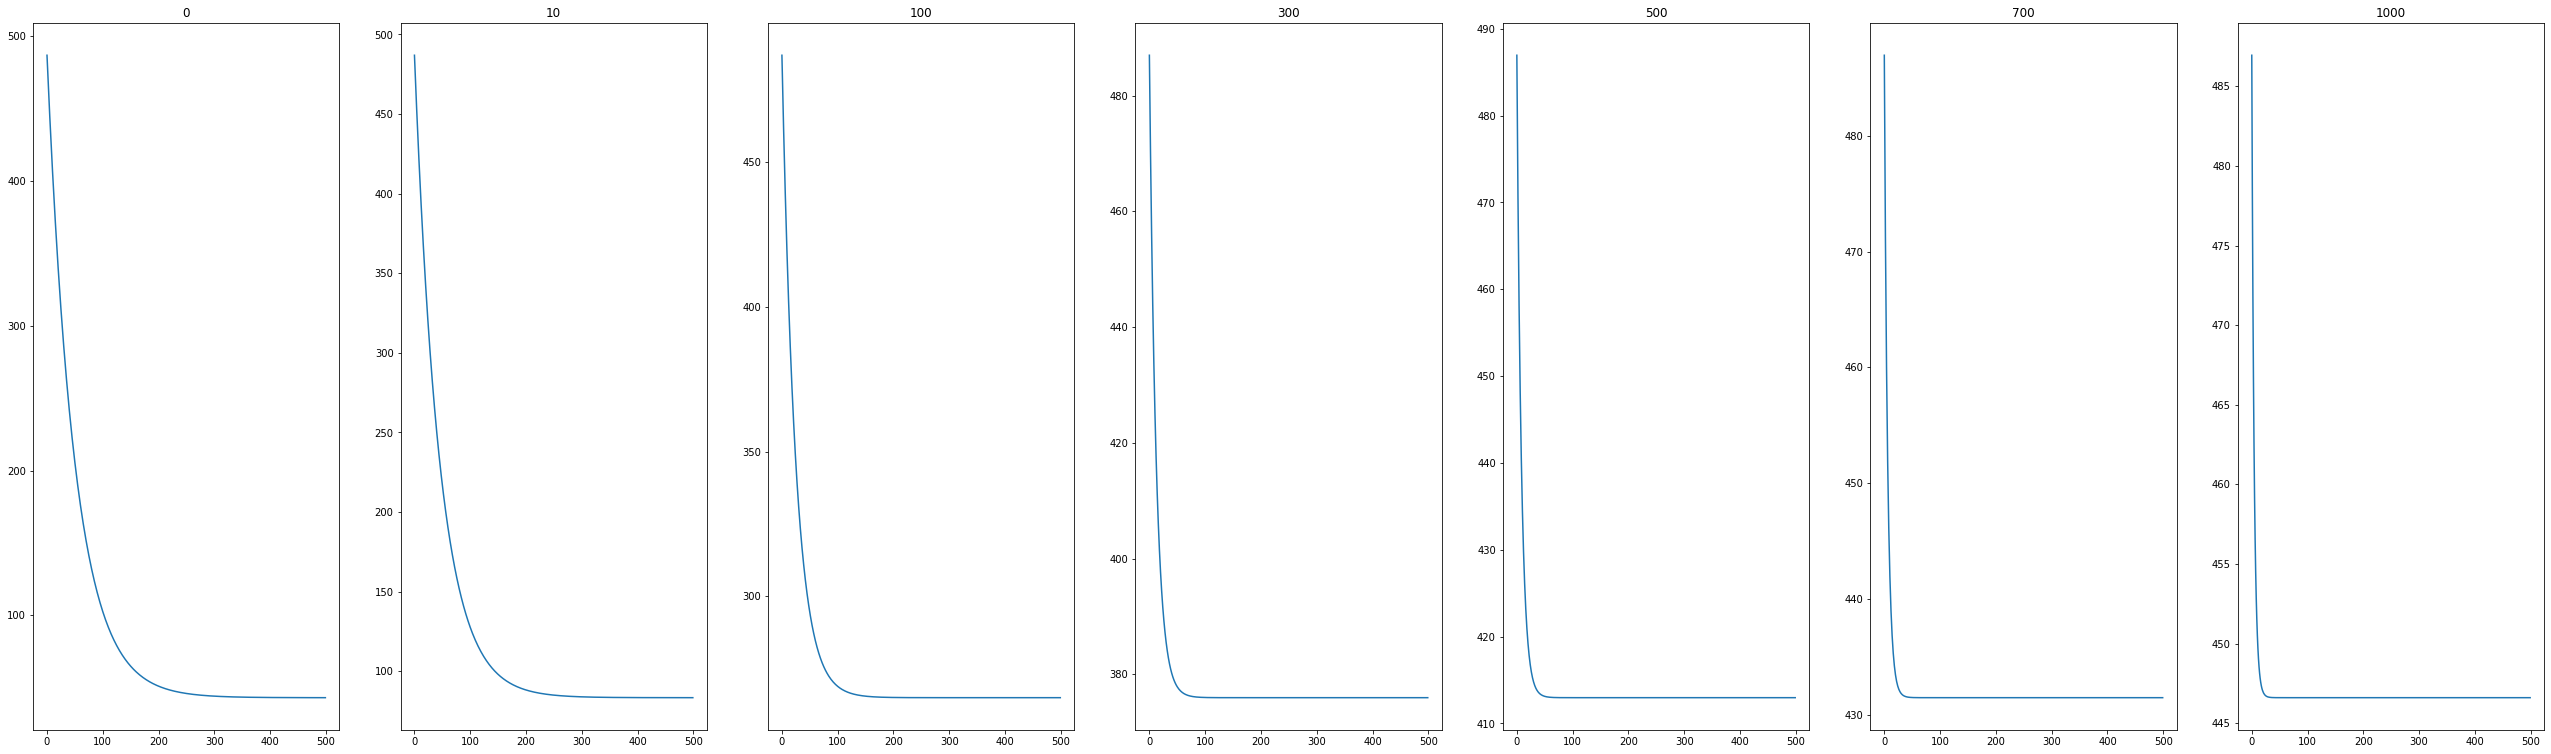

In [594]:
fig, ax = plt.subplots(1,len(lambdas), figsize=(45,13))

for l, info in enumerate(models.items()):
    lambda_, cost_history = info
    ax[l].plot([i for i in range(500)],cost_history)
    ax[l].set_title(lambda_)

![](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Poly-regression and Regularization

In [595]:
X4,Y4 = make_regression(n_samples=100,n_features=1,n_informative=1,noise = 10,random_state=10)

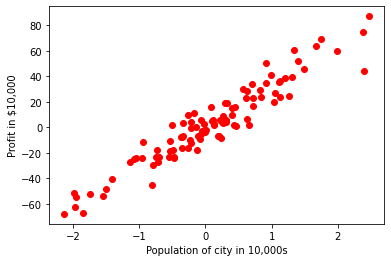

In [596]:
plot(X4,Y4)

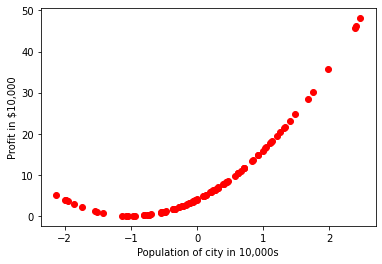

In [597]:
y_ = 4*(X4 + 1)**2
y_ = y_.reshape(-1)
plot(X4,y_)

In [598]:
model4 = LinearRegression()

In [599]:
x1 = X4.copy()
x2 = X4.copy()**2
x3 = X4.copy()**4
x4 = np.exp(X4.copy())
x_ = np.concatenate([x1,x2,x3,x4], axis=1)

In [600]:
params4 = model4.fit(x=x_, y=y_, learning_rate=0.01 ,epochs=500, verbose=100, lambda_=0)
params4

Cost after 0 epochs: 85.44733466792482
Cost after 100 epochs: 6.433407429524379
Cost after 200 epochs: 1.527928578234013
Cost after 300 epochs: 0.8392811837277792
Cost after 400 epochs: 0.6837702798374855


array([[8.34602264],
       [4.85219844],
       [2.46085719],
       [0.92032243],
       [3.69451195]])

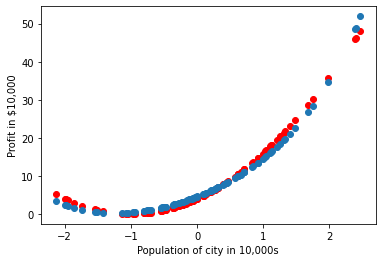

In [601]:
predictions = model4.predict(x_).reshape(-1)
plot(X4,y_,pred=predictions,draw_line=True, hard_line=False)

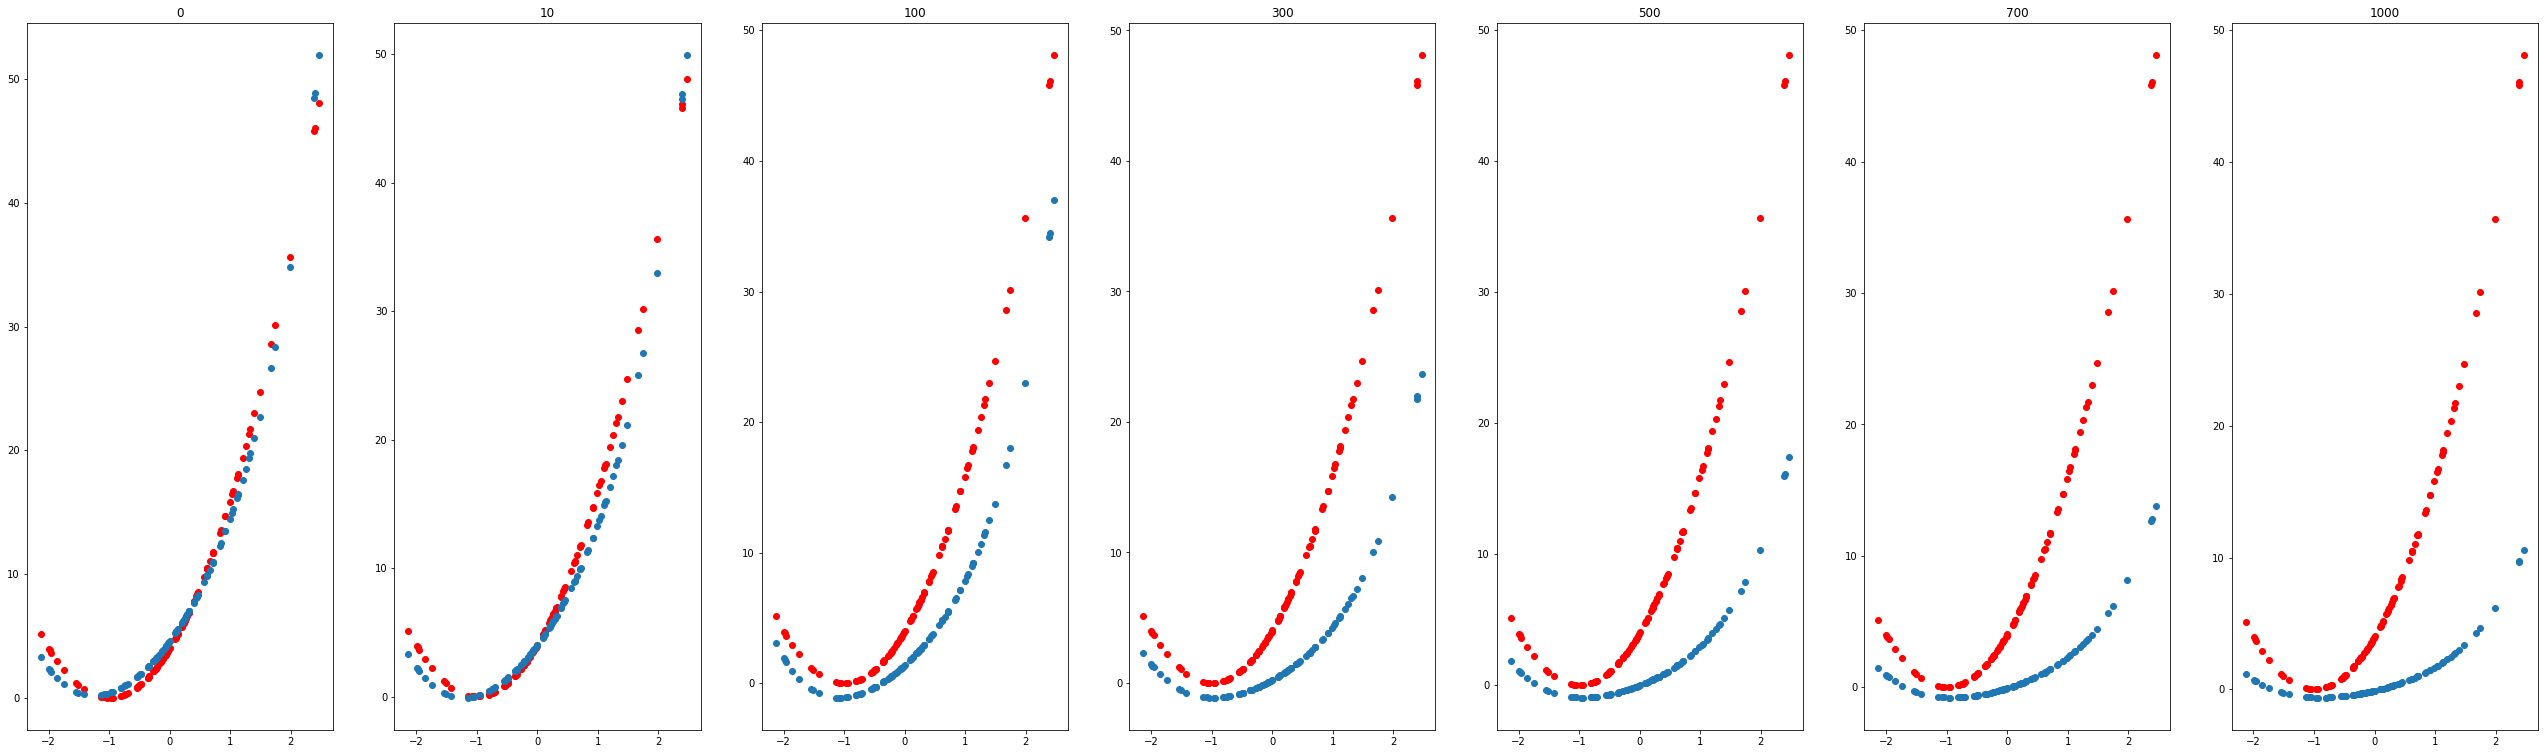

In [602]:
lambdas = [0,10,100,300,500,700,1000]
fig, ax = plt.subplots(1,len(lambdas), figsize=(45,13))
models = {}
for l in range(len(lambdas)):
    m = x_.shape[0]
    model4 = LinearRegression()
    model4.fit(x=x_, y=y_, learning_rate=0.01,lambda_=lambdas[l],epochs=500)    
    preds = model4.predict(x_)
    preds = preds.reshape(-1)
    models[lambdas[l]] = model4.cost_history
    ax[l].scatter(x=X4, y=y_, color="red")
    ax[l].scatter(X4,preds)
    ax[l].set_title(lambdas[l])

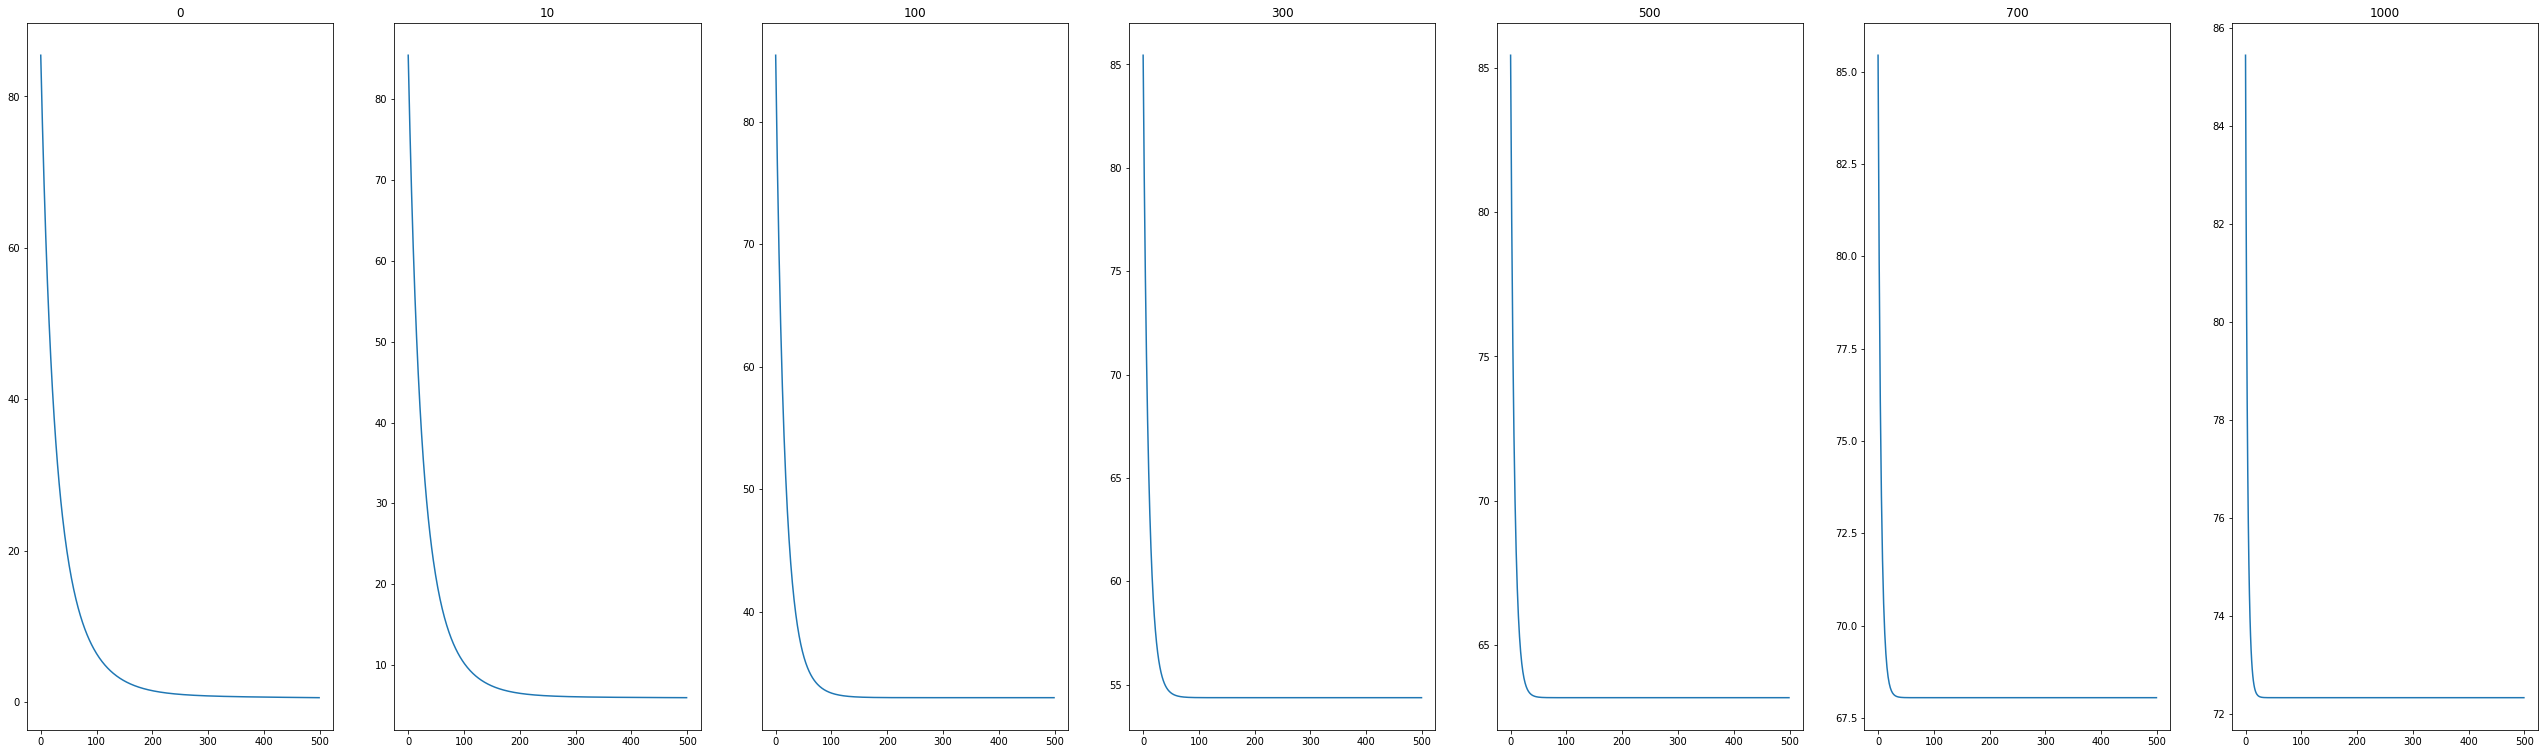

In [603]:
fig, ax = plt.subplots(1,len(lambdas), figsize=(45,13))

for l, info in enumerate(models.items()):
    lambda_, cost_history = info
    ax[l].plot([i for i in range(500)],cost_history)
    ax[l].set_title(lambda_)